## Laufzeitdiagramm
Das folgende Skript berechnet das Laufzeitdiagramm für eine vorgegebene Geschwindigkeitstiefenverteilung. Das voreingestelle Modell entspricht etwa der Situation, die wir auf dem Campus in Lankwitz vorfinden. 

### Model Setup
Das Modell besteht aus zwei Schichten mit zwei verschiedenen Geschwindigkeiten, die in der Variable *v* definiert sind. Die Tiefe der Schichtoberkanten wird in der Variable *z* definiert. Die Aufnahmegeometrie (Position der Geophone ) wird durch die zwei Variablen *rec_num* und *dx* beschrieben, die die Anzhal der Geophone und den jeweiligen Abstand zwischen den Geophonen beschreiben. 

Die erste Zelle stellt die Aufnahmegeometrie über dem Modell graphisch dar:  

AttributeError: 'PolyCollection' object has no property 'shading'

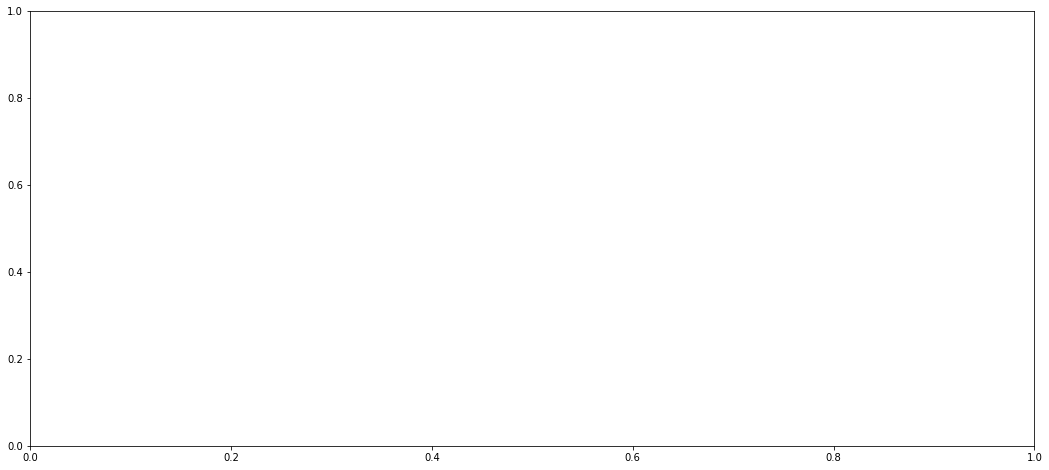

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Model

z = np.array([0,7]) # Tiefe in m
v = np.array([350,1800]) # Geschwindigkeit in [m/s]

rec_num=24 # Anzahl Empfänger
dx=2 # Empfängerabstand in m

# Ab hier nichts mehr verändern


plt.figure(figsize=(18,8))
mod = np.vstack((v[0]*np.ones([10,(rec_num+2)*dx]),v[1]*np.ones([10,(rec_num+2)*dx])))
plt.pcolor(np.linspace(0,50,(rec_num+2)*dx+1),np.linspace(0,2*z[1],21),mod,shading="flat")
plt.xlim([-.5,50])
plt.ylim([-.5,2*z[1]])
cbar = plt.colorbar()
cbar.set_label('Geschwindigkeit in m/s', rotation=90)
cbar.ax.invert_yaxis()
plt.gca().invert_yaxis()
plt.plot(0,0,'r*',markersize=18,label='Schusspunkt')
plt.plot(np.arange(dx,rec_num*dx+1,dx),np.zeros(rec_num),'gv',markersize=18,label = 'Geophone')
plt.legend()
plt.title('Aufnahmegeometrie')
plt.ylabel('Tiefe in m')
plt.xlabel('Profillänge in m')
plt.show()

### Laufzeitdiagramm

Die folgende Zelle berechnet für das oben definierte Modell das Laufzeitdiagramm.

**Bitte beachten Sie, dass Sie nach jeder Änderung in der oberen Zelle diese zunächst ebenfalls ausführen müssen (Strg+Enter).** 

Beantworten Sie mithilfe der generierten Abbildung die Fragen des Übungszettels.

Kritische Entfernung 2.78m 
Überholentfernung: 17.05m 
Kritischer Winkel: 11.21° 



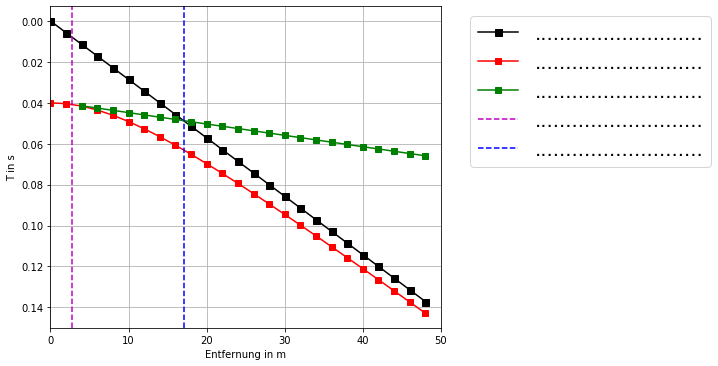

In [20]:
## Hier nichts verändern !

# Compute Traveltimes

if v[0] > v[1]:
    alpha_krit=0
    x_crit=0
    r_crit=0
    x_ue=0

else:
    alpha_krit = np.arcsin(v[0]/v[1])*180/np.pi
    x_crit = np.tan(np.deg2rad(alpha_krit))*z[1]
    r_crit = np.sqrt((x_crit**2) + z[1]**2)
    x_ue = 2*z[1]*np.sqrt((v[0]+v[1])/(v[1]-v[0]))
x_max=(rec_num)*dx
inc=np.intc(x_max/dx)+1   
x_vec = np.linspace(0,x_max,inc)
direct = np.zeros(len(x_vec))
reflect = np.zeros(len(x_vec))
refrac = np.zeros(len(x_vec))*np.NaN
for idx,x in enumerate(x_vec):
    direct[idx] = x/v[0]
    reflect[idx] = 2*np.sqrt((x/2)**2 + z[1]**2)/v[0]
    if x > x_crit*2:
        refrac[idx] = 2*r_crit/v[0] + (x-2*x_crit)/v[1]   

plt.figure(figsize=(10,5))
plt.plot(x_vec,direct,'ks-',markersize = 7,label='...........................')
plt.plot(x_vec,reflect,'rs-',label='...........................')
if v[0] < v[1]:
    plt.plot(x_vec,refrac,'gs-',label='...........................')
    plt.axvline(2*x_crit,Color='m',linestyle = '--',label='...........................')
    plt.axvline(x_ue,Color='b',linestyle = '--',label='...........................')
    print('Kritische Entfernung %.2fm \nÜberholentfernung: %.2fm \nKritischer Winkel: %.2f° \n'%(2*x_crit,x_ue,alpha_krit))
#plt.legend(loc = 0,prop={'size': 18})
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 20})
plt.tight_layout()
plt.xlim([0,x_max+dx])
plt.gca().invert_yaxis()
plt.ylabel('T in s')
plt.xlabel('Entfernung in m')
plt.grid('on')
plt.show()

